<a href="https://colab.research.google.com/github/BKover99/Pseudovisium/blob/main/Paper%20figures/Fig4A_QC_CosMx_NSCLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading dataset information and installing packages

In [1]:
!wget https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
!pip install Pseudovisium -q
!pip install pympler -q


--2024-06-17 19:02:03--  https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx [following]
--2024-06-17 19:02:03--  https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42301 (41K) [application/octet-stream]
Saving to: ‘Datasets_all.xlsx’

Datasets_all.xlsx   100%[===================>]  41.31K  --.-KB/s    in 0.04s   

2024-06-17 19:02:04 (1019 KB/s) - ‘Datasets_all.xlsx’ saved [42301/42301]

     ━━━━━━━━━━━━━━━━━━

Loading packages and defining convenient function to locate .csv file of interest.

In [11]:
import pandas as pd
from os import system
from Pseudovisium.pseudovisium_generate import generate_pv
import os
import time
import squidpy as sq
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from pympler import asizeof
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics
import shutil
import subprocess
import concurrent.futures


def find_csv_with_transcript(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if ((file.endswith('.csv') or file.endswith('.csv.gz')) and (('transcript' in file.lower() or 'tx' in file.lower()))) and 'macosx' not in root.lower() and '._' not in file.lower():
                return os.path.join(root, file)
    return None


Getting the dataset download links.

In [4]:
datasets = pd.read_excel("/content/Datasets_all.xlsx")
datasets_to_use = datasets[datasets["Cosmx_lung"]==1]
#remove those without link
datasets_to_use = datasets_to_use[~datasets_to_use["Onedrive_link"].isna()]
datasets_to_use.reset_index(drop=True,inplace=True)
datasets_to_use

,Author,Year,Paper_DOI,Link_to_dataset,Onedrive_link,Name,Technology,Tissue,Species,Visium_xenium_notebook,PV_workflow_comparison,Comparing_all_tech,Pulmonary Xenium,Cosmx_lung,Dataset_merge_visium,Brain case study,Just Visium example
0,Nanostring,2022,DOI: 10.1038/s41587-022-01483-z,https://nanostring.com/products/cosmx-spatial-...,https://vgocqw.bl.files.1drv.com/y4mNw37uF9wd_...,CosMx_nsclc_5_1,CosMx_prototype,Lung_NSCLC,Human,0,1,1,0,1,0,0,0
1,Nanostring,2022,DOI: 10.1038/s41587-022-01483-z,https://nanostring.com/products/cosmx-spatial-...,https://ifz0xa.bl.files.1drv.com/y4mTHM4bk8Ttk...,CosMx_nsclc_5_2,CosMx_prototype,Lung_NSCLC,Human,0,0,0,0,1,0,0,0
2,Nanostring,2022,DOI: 10.1038/s41587-022-01483-z,https://nanostring.com/products/cosmx-spatial-...,https://8lnrra.bl.files.1drv.com/y4mhDToinyLHH...,CosMx_nsclc_5_3,CosMx_prototype,Lung_NSCLC,Human,0,0,0,0,1,0,0,0
3,Nanostring,2022,DOI: 10.1038/s41587-022-01483-z,https://nanostring.com/products/cosmx-spatial-...,https://hohnuq.bl.files.1drv.com/y4mKWx0U7VEEx...,CosMx_nsclc_6,CosMx_prototype,Lung_NSCLC,Human,0,0,0,0,1,0,0,0
4,Nanostring,2022,DOI: 10.1038/s41587-022-01483-z,https://nanostring.com/products/cosmx-spatial-...,https://kd26iq.bl.files.1drv.com/y4mtWoQzs3BK6...,CosMx_nsclc_9_1,CosMx_prototype,Lung_NSCLC,Human,0,1,1,0,1,0,0,0
5,Nanostring,2022,DOI: 10.1038/s41587-022-01483-z,https://nanostring.com/products/cosmx-spatial-...,https://6wwmfw.bl.files.1drv.com/y4mtFdh7st4RO...,CosMx_nsclc_9_2,CosMx_prototype,Lung_NSCLC,Human,0,0,0,0,1,0,0,0
6,Nanostring,2022,DOI: 10.1038/s41587-022-01483-z,https://nanostring.com/products/cosmx-spatial-...,https://zw1oqa.bl.files.1drv.com/y4mfFbvWw0PFh...,CosMx_nsclc_12,CosMx_prototype,Lung_NSCLC,Human,0,0,0,0,1,0,0,0
7,Nanostring,2022,DOI: 10.1038/s41587-022-01483-z,https://nanostring.com/products/cosmx-spatial-...,https://v9qdoq.bl.files.1drv.com/y4mFR6AegFeiI...,CosMx_nsclc_13,CosMx_prototype,Lung_NSCLC,Human,0,1,1,0,1,0,0,0


Downloading and decompressing the datasets

In [5]:
import os
def download_and_unzip(dataset):
    try:
        download_link = dataset["Onedrive_link"]
        name = dataset["Name"]
        print(f"Processing dataset: {name}")
        print(f"Download link: {download_link}")

        command = "wget {}".format(download_link)
        subprocess.run(command, shell=True, check=True)

        filename = download_link.split("com/")[-1]
        archive_name = filename.split("/")[-1]

        try:
            command_unzip = "unzip -d /content/{} /content/{}".format(name, filename)
            print(command_unzip)
            subprocess.run(command_unzip, shell=True, check=True)
            print("Successfully unzipped {}.".format(archive_name))
            os.remove("/content/{}".format(filename))  # Remove the zip file
        except subprocess.CalledProcessError:
            print("Failed to unzip {}. Attempting other methods.".format(archive_name))

            try:
                command_gunzip = "gunzip -d /content/{} /content/{}".format(name, filename)
                subprocess.run(command_gunzip, shell=True, check=True)
                print("Successfully gunzipped {}.".format(archive_name))
                os.remove("/content/{}".format(filename))   # Remove the zip file
            except subprocess.CalledProcessError:
                print("Failed to gunzip {}. Attempting other methods.".format(archive_name))

                try:
                    os.makedirs("/content/{}".format(name), exist_ok=True)
                    command_untar = "tar -xvf /content/{} -C /content/{}".format(filename, name)
                    subprocess.run(command_untar, shell=True, check=True)
                    print("Successfully untarred {}.".format(archive_name))
                    os.remove("/content/{}".format(filename))   # Remove the zip file
                except subprocess.CalledProcessError:
                    try:

                      command_untar = "tar -xvzf /content/{} -C /content/{}".format(filename, name)
                      subprocess.run(command_untar, shell=True, check=True)
                      print("Successfully untarred {}.".format(archive_name))
                      os.remove("/content/{}".format(filename))   # Remove the zip file
                    except:
                      print("All methods failed to extract {}.".format(archive_name))

    except KeyError as e:
        print(f"Error: Missing required column in dataset: {str(e)}")
    except subprocess.CalledProcessError as e:
        print(f"Error: Command failed: {str(e)}")
    except Exception as e:
        print(f"Error: An unexpected error occurred: {str(e)}")

# Create a thread pool with a maximum of 10 threads
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    # Submit download and unzip tasks to the thread pool
    futures = [executor.submit(download_and_unzip, row.to_dict()) for _, row in datasets_to_use.reset_index(drop=True).iterrows()]

    # Wait for all tasks to complete
    concurrent.futures.wait(futures)

Processing dataset: CosMx_nsclc_5_1
Download link: https://vgocqw.bl.files.1drv.com/y4mNw37uF9wd_xK0Q59qYpEtYmWsdnQT6OAmtNEiVvX-luZR6SbFmvplO7jD30dW1Uq9JLkMpA0qC9R5TvHgXRxeRXj5arXB0BSospaTgDzbdff_IoMuL3htinmILGBH0NYl74T6SqQq_JLOzkY1GcyIsan5E5tfZP5Y300CfL-PcdF-iIiz8-QtQxCxwtE8BzHfPnUPKjiXWpOxuLmB5FRTA
Processing dataset: CosMx_nsclc_5_2
Download link: https://ifz0xa.bl.files.1drv.com/y4mTHM4bk8TtkZQkaJggGTC1iGPJQoPP0iZfdXVkKL2L7bzq9jgh2_amWkruy40nKOH_lcP8Y2A_Fek3J7XzALfPlkkJ8LI2FCkArLKtSeLjSLGwgqnVEtLEzfaKPl9Kxn2WcMMfFbzAF8WQ61Zcu9QIiSS_Vm9UODov2ixriNRQp9x_MKzyb3CiDZIl7aA0-IhR2fVXzZR32PfqxeN4oLY2g
Processing dataset: CosMx_nsclc_5_3
Download link: https://8lnrra.bl.files.1drv.com/y4mhDToinyLHHx81QMnwp-79dC1YF5v-Vuwq4N7qkmtf6hHwuy_9ISUtZjBOvS55FRmMKGYz8-pKL05Oure7pZO9XCXV9Rqo7ptfRSwvTIGRuXGmqnq4todD1qvw1J-I8KZjiJxb13WCK2Zhrl1AegU5ASMABht1LKRkXQs-SVSQPbZnjiE9JB_kdpL_H_BQfWfhe0jEmbS8hpZSnOq_CVPow
Processing dataset: CosMx_nsclc_6
Download link: https://hohnuq.bl.files.1drv.com/y4mKWx0U7VEE

Running the hexagonal binning via pseudovisium_generate.

In [6]:
from Pseudovisium.pseudovisium_generate import generate_pv
output_path="/content/"
hexagon_size=50
max_workers=10

for i in range(len(datasets_to_use)):
    name = datasets_to_use["Name"].values[i]
    csv_file = find_csv_with_transcript("/content/"+name+"/")
    print(csv_file)

    #getting unique cell names for old SMI data
    df = pd.read_csv(csv_file)

    # Create a new column called 'cell' by concatenating 'fov' and 'cell_ID' columns
    df['cell'] = df['fov'].astype(str) + '_' + df['cell_ID'].astype(str)

    # Save the updated DataFrame back to the original CSV file
    df.to_csv(csv_file, index=False)

    generate_pv(csv_file=csv_file,
                hexagon_size=hexagon_size,
                output_path=output_path,
                batch_size=5000000,
                technology="Nanostring",
                max_workers=max_workers,
                project_name=name,
                coord_to_um_conversion=0.18,
                shift_to_positive=True)


/content/CosMx_nsclc_5_1/Lung5_Rep1/Lung5_Rep1-Flat_files_and_images/Lung5_Rep1_tx_file.csv
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-17
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexajr2vu0l_
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Finished preprocessing. Total batches created: 8
Processing batches using 8 processes


Processing batches: 100%|██████████| 8/8 [02:06<00:00, 15.80s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_nsclc_5_1
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 37226610.0
Number of unique hexagons: 1087
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 454.45068860054016 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
/content/CosMx_nsclc_5_2/Lung5_Rep2/Lung5_Rep2-Flat_files_and_images/Lung5_Rep2_tx_file.csv
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-17
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexa4gbvn3nb
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Finished preprocessing. Total batches created: 9
Processing batches using 8 processes


Processing batches: 100%|██████████| 9/9 [02:50<00:00, 18.98s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_nsclc_5_2
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 40286575.0
Number of unique hexagons: 1061
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 510.87267327308655 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
/content/CosMx_nsclc_5_3/Lung5_Rep3/Lung5_Rep3-Flat_files_and_images/Lung5_Rep3_tx_file.csv
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-17
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexa8kimc86v
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Finished preprocessing. Total batches created: 7
Processing batches using 8 processes


Processing batches: 100%|██████████| 7/7 [01:42<00:00, 14.69s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_nsclc_5_3
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 31481632.0
Number of unique hexagons: 1087
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 386.15721344947815 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
/content/CosMx_nsclc_6/Lung6/Lung6-Flat_files_and_images/Lung6_tx_file.csv
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-17
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexazvb8r5f_
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Finished preprocessing. Total batches created: 8
Processing batches using 8 processes


Processing batches: 100%|██████████| 8/8 [01:59<00:00, 14.95s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_nsclc_6
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 35777062.0
Number of unique hexagons: 1072
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 450.5401873588562 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
/content/CosMx_nsclc_9_1/Lung9_Rep1/Lung9_Rep1-Flat_files_and_images/Lung9_Rep1_tx_file.csv
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-17
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexae9trt45a
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Finished preprocessing. Total batches created: 6
Processing batches using 8 processes


Processing batches: 100%|██████████| 6/6 [01:33<00:00, 15.65s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_nsclc_9_1
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 26275891.0
Number of unique hexagons: 702
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 354.63734459877014 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
/content/CosMx_nsclc_9_2/Lung9_Rep2/Lung9_Rep2-Flat_files_and_images/Lung9_Rep2_tx_file.csv
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-17
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary direc

Processing batches: 100%|██████████| 7/7 [01:50<00:00, 15.84s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_nsclc_9_2
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 33443058.0
Number of unique hexagons: 1596
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 405.74452900886536 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
/content/CosMx_nsclc_12/Lung12/Lung12-Flat_files_and_images/Lung12_tx_file.csv
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-17
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tm

Processing batches: 100%|██████████| 6/6 [01:34<00:00, 15.70s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_nsclc_12
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 26058382.0
Number of unique hexagons: 999
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 322.2542197704315 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
/content/CosMx_nsclc_13/Lung13/Lung13-Flat_files_and_images/Lung13_tx_file.csv
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-17
Technology is Nanostring. Going forward with default column names.
Quality filter is set to False
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_

Processing batches: 100%|██████████| 6/6 [01:42<00:00, 17.01s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/CosMx_nsclc_13
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 29995458.0
Number of unique hexagons: 702
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 359.30151987075806 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.


Getting a list of pseudovisium folders to input into the QC.

In [7]:
import os
directory = "/content/pseudovisium/"
# Get a list of all subfolders in the directory with their full paths
folders = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
folders

['/content/pseudovisium/CosMx_nsclc_5_2',
 '/content/pseudovisium/CosMx_nsclc_5_3',
 '/content/pseudovisium/CosMx_nsclc_5_1',
 '/content/pseudovisium/CosMx_nsclc_9_2',
 '/content/pseudovisium/CosMx_nsclc_12',
 '/content/pseudovisium/CosMx_nsclc_13',
 '/content/pseudovisium/CosMx_nsclc_9_1',
 '/content/pseudovisium/CosMx_nsclc_6']

Running the QC via pseudovisium_qc

In [8]:
from Pseudovisium.pseudovisium_qc import generate_qc_report
output_folder="/content/"
gene_names=["Kitl","Fstl5","Slit2"]
generate_qc_report(folders,
                   output_folder,
                   gene_names,
                   include_morans_i=True,
                   max_workers=10,
                   normalisation=True,
                   save_plots=True,
                   squidpy=True)

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


Plots will be saved
Going ahead with the squidpy implementation. Only worth doing for large datasets.
Loading squidpy and scanpy


Processing folders:   0%|          | 0/8 [00:00<?, ?it/s]

folder /content/pseudovisium/CosMx_nsclc_5_2/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  12%|█▎        | 1/8 [00:37<04:20, 37.22s/it]

folder /content/pseudovisium/CosMx_nsclc_5_3/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  25%|██▌       | 2/8 [01:04<03:08, 31.44s/it]

folder /content/pseudovisium/CosMx_nsclc_5_1/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  38%|███▊      | 3/8 [01:32<02:28, 29.74s/it]

folder /content/pseudovisium/CosMx_nsclc_9_2/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  50%|█████     | 4/8 [02:07<02:06, 31.73s/it]

folder /content/pseudovisium/CosMx_nsclc_12/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  62%|██████▎   | 5/8 [02:32<01:28, 29.49s/it]

folder /content/pseudovisium/CosMx_nsclc_13/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  75%|███████▌  | 6/8 [02:55<00:54, 27.18s/it]

folder /content/pseudovisium/CosMx_nsclc_9_1/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  88%|████████▊ | 7/8 [03:28<00:29, 29.22s/it]

folder /content/pseudovisium/CosMx_nsclc_6/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders: 100%|██████████| 8/8 [04:09<00:00, 31.25s/it]


        Consider removing these datasets from analysis: ['CosMx_nsclc_5_2', 'CosMx_nsclc_5_3', 'CosMx_nsclc_5_1', 'CosMx_nsclc_9_2', 'CosMx_nsclc_12', 'CosMx_nsclc_13', 'CosMx_nsclc_9_1', 'CosMx_nsclc_6']
        Consider removing these datasets from analysis: ['CosMx_nsclc_5_2', 'CosMx_nsclc_5_3', 'CosMx_nsclc_5_1', 'CosMx_nsclc_9_2', 'CosMx_nsclc_12', 'CosMx_nsclc_13', 'CosMx_nsclc_9_1', 'CosMx_nsclc_6']
include_morans_i:  True
quality_per_hexagon:  False
quality_per_probe:  False
cell_info:  True
You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-17
HTML file generated successfully!


Generating the plot from the paper.

<ipython-input-9-d63501fa2fd1>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=90, fontsize=10)


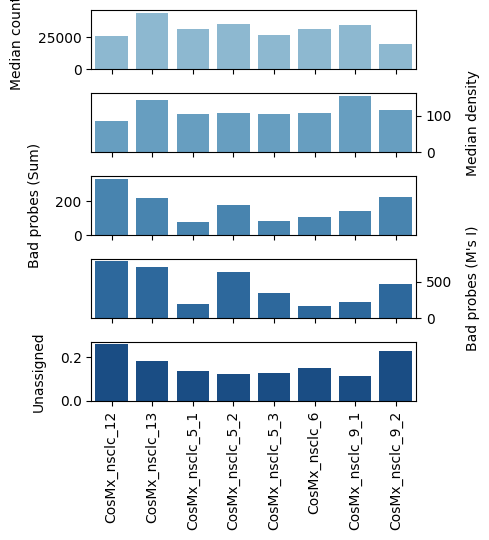

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/pv_qc_2024-06-17/metrics_table.csv")

# Sort the DataFrame by 'Dataset' column alphabetically
data = data.sort_values('Dataset')

fig, axes = plt.subplots(5, 1, figsize=(5, 5.5), sharex=True)

# Define a color palette with four distinct colors
colors = sns.color_palette("Blues", 8)[3:]

# Bar chart 1: Median counts per hexagon
sns.barplot(x='Dataset', y='Median counts per hexagon', data=data, ax=axes[0], color=colors[0])
axes[0].tick_params(axis='y', labelsize=10)
axes[0].set_ylabel('Median counts', fontsize=10, labelpad=10)

# Bar chart 2: Median density (cells per hexagon)
sns.barplot(x='Dataset', y='Median density (cells per hexagon)', data=data, ax=axes[1], color=colors[1])
axes[1].tick_params(axis='y', labelsize=10, left=False, right=True, labelleft=False, labelright=True)
axes[1].set_ylabel('Median density', fontsize=10, labelpad=10)
axes[1].yaxis.set_label_position("right")

# Bar chart 3: Number of bad probes (Sum)
sns.barplot(x='Dataset', y='Number of bad probes (Sum)', data=data, ax=axes[2], color=colors[2])
axes[2].tick_params(axis='y', labelsize=10)
axes[2].set_ylabel('Bad probes (Sum)', fontsize=10, labelpad=10)

# Bar chart 4: Number of bad probes (Morans I)
sns.barplot(x='Dataset', y='Number of bad probes (Morans I)', data=data, ax=axes[3], color=colors[3])
axes[3].tick_params(axis='y', labelsize=10, left=False, right=True, labelleft=False, labelright=True)
axes[3].set_ylabel("Bad probes (M's I)", fontsize=10, labelpad=10)
axes[3].yaxis.set_label_position("right")

sns.barplot(x='Dataset', y='Median pct unassigned', data=data, ax=axes[4], color=colors[4])
axes[4].tick_params(axis='y', labelsize=10)
axes[4].set_ylabel("Unassigned", fontsize=10, labelpad=10)

# Set x-tick labels and rotate them
axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=90, fontsize=10)
axes[-1].set_xlabel('')

plt.tight_layout()
plt.savefig("barplot_cosmx.svg")
plt.show()

Outputting the package versions.

In [10]:
import subprocess

# Run the pip freeze command to get a list of installed packages
output = subprocess.check_output(['pip', 'freeze']).decode('utf-8').strip().split('\n')

print("Installed packages:")
for package in output:
    print(package)

Installed packages:
absl-py==1.4.0
access==1.1.9
adjustText==1.1.1
affine==2.4.0
aiobotocore==2.5.4
aiohttp==3.9.5
aioitertools==0.11.0
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
anndata==0.10.7
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_api_compat==1.7.1
array_record==0.5.1
arviz==0.15.1
asciitree==0.3.3
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
botocore==1.31.17
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.3
colorcet==3.1.0
colorlover=